모델 훈련
===

설정
---

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Unknown system')
    
import os
PROJECT_DIR = r'C:\Users\default.DESKTOP-S5Q9GAA\Documents\Programs\study_datascience\scikit_learn\handson\images'
CHAPTER_ID = 'training_linear_models'

if os.path.isdir(os.path.join(PROJECT_DIR, CHAPTER_ID)):
    pass
else:
    os.makedirs(os.path.join(PROJECT_DIR, CHAPTER_ID))

    
def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_DIR, CHAPTER_ID, fig_id + 'png')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = 'png', dpi = 300)
    
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

정규 방정식을 사용한 선형 회귀
----

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

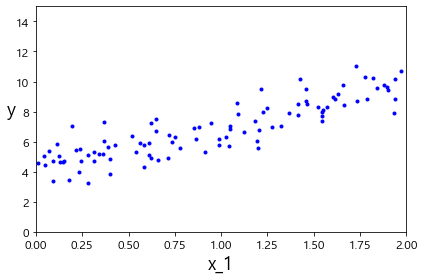

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('x_1', fontsize = 18)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')
plt.show()

In [5]:
# 정규 방정식을 이용하여 Theta 값 예측하기
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
# theta_best를 사용해 theta_hat 예측해보기
# x값에 0을 넣었을 때 4.2, 2를 넣었을 때 9.7이라는 값을 예측함
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [9]:
X_new_b

array([[1., 0.],
       [1., 2.]])

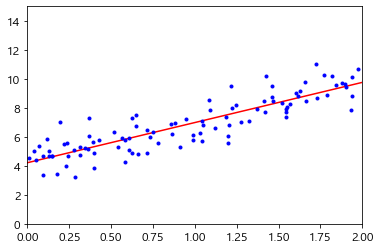

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
# 같은 작업을 하는 사이킷런 코드
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

배치 경사하강법
-----

In [13]:
# 배치 경사 하강법
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b) 
    plt.plot(X, y, 'b.')
    n_iterations = 1000 
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('x_1', fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r'$\eta = {}$'.format(eta), fontsize = 16)

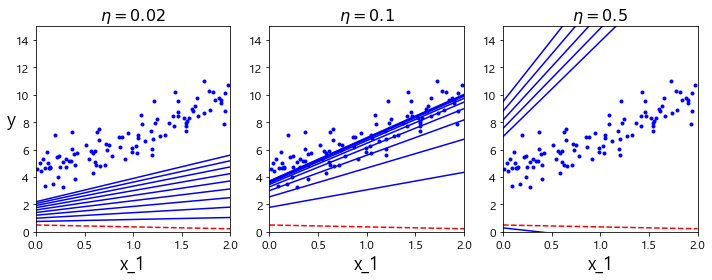

In [15]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize = (10, 4))
plt.subplot(131);
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.subplot(132)
plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)

save_fig('gradient_descent_plot')
plt.show()

확률적 경사 하강법
---

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

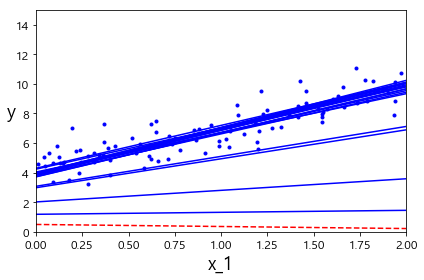

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터
m = 100 # 샘플 수

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m) # 훈련 샘플의 수 안에서 랜덤 정수를 고름
        xi = X_b[random_index : random_index + 1] # X에서 랜덤 정수에 해당하는 세트 고름
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # 학습 스케줄 하이퍼파라미터로 학습률 조정
        theta = theta - eta * gradients 
        theta_path_sgd.append(theta)
        
plt.plot(X, y, 'b.')
plt.xlabel('x_1', fontsize = 18)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
save_fig('sgd_plot')
plt.show()

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23166744]), array([2.79099659]))

미니배치 경사 하강법
----

In [20]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indicies = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indicies]
    y_shuffled = y[shuffled_indicies]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

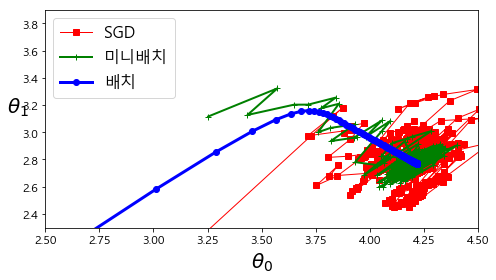

In [23]:
plt.figure(figsize = (7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth = 1, label = 'SGD')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth = 2, label = '미니배치')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth = 3, label = '배치')
plt.legend(loc = 'upper left', fontsize = 16)
plt.xlabel(r'$\theta_0$', fontsize = 20)
plt.ylabel(r'$\theta_1$', fontsize = 20, rotation = 0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig('gradient_descent_path_plot')
plt.show()

다항 회귀
---

In [24]:
import numpy.random as rnd

np.random.seed(42)

In [25]:
# 2차 방정식 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

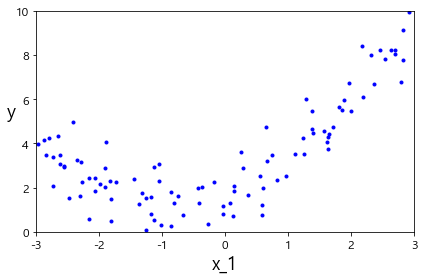

In [26]:
plt.plot(X,y, 'b.')
plt.xlabel('x_1', fontsize = 18)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_data_plot')
plt.show()

In [27]:
# 직선에 맞지 않으므로 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
# X_poly는 원래 특성 X와 이 특성의 제곱
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, X)
lin_reg.intercept_, lin_reg.coef_

(array([1.38777878e-16]), array([[ 1.00000000e+00, -1.67241877e-17]]))

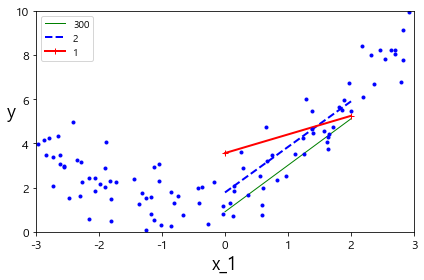

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    ling_reg = LinearRegression()
    polynominal_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    polynominal_regression.fit(X, y)
    y_newbig = polynominal_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('x_1', fontsize = 18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig('high_degree_polynominal_plot')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = '훈련')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label = '검증')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('훈련 세트 크기', fontsize=14)
    plt.ylabel('RMSE', fontsize = 14)

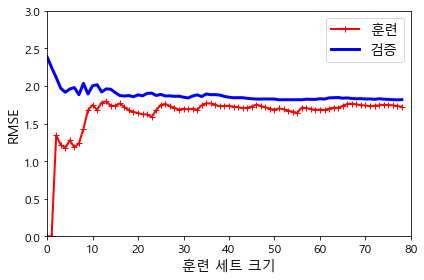

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig('underfitting_learning_curves_plot')
plt.show()

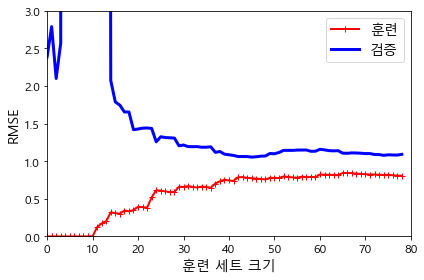

In [33]:
# 더 복잡한 모델 사용하기

polynominal_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynominal_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig('learning_curves_plot')
plt.show()

규제가 있는 선형 모델
-----

릿지 회귀
----

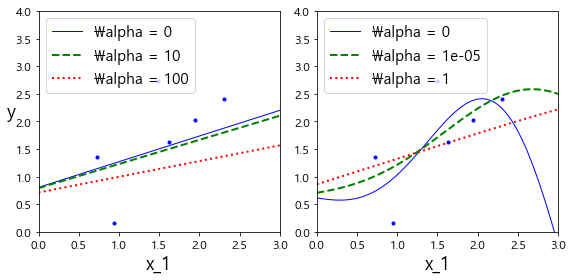

In [34]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.randn(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/ 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynominal, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynominal:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label = r'\alpha = {}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('x_1', fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynominal=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('y', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynominal=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig('ridge_regression_plot')
plt.show()

In [35]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky', random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.50110825]])

In [36]:
sgd_reg = SGDRegressor(max_iter = 50, penalty='l2', tol = 1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.36363727])

라쏘 회귀
---

In [37]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.47614517])

엘라스틱넷
----

In [38]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.48310271])

조기 종료
-----

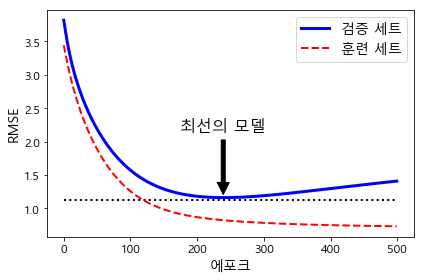

In [39]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1,
                      penalty=None,
                      eta0=0.0005,
                      warm_start=True,
                      learning_rate='constant',
                      random_state=42)
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('최선의 모델',
            xy = (best_epoch, best_val_rmse),
            xytext=(best_epoch, best_val_rmse + 1),
            ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16
            )

best_val_rmse -= 0.03 # 그래프가 더 이쁘게 보이게 하기 위해서
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], 'k:', linewidth=2)
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')
plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='훈련 세트')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('에포크', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
save_fig('early_stopping_plot')
plt.show()

In [40]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [41]:
y[:5]

array([[1.61761105],
       [8.06185944],
       [4.45250583],
       [0.77958493],
       [1.84625712]])

In [42]:
y[:5].ravel()

array([1.61761105, 8.06185944, 4.45250583, 0.77958493, 1.84625712])

In [43]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter = 1, warm_start=True, penalty=None,
                      learning_rate = 'constant', eta0=0.0005, random_state=42)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [44]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
        verbose=0, warm_start=True))

로지스틱 회귀
-----

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

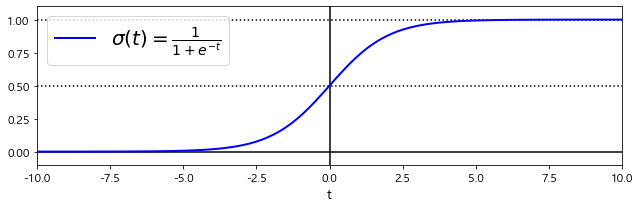

In [15]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [16]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

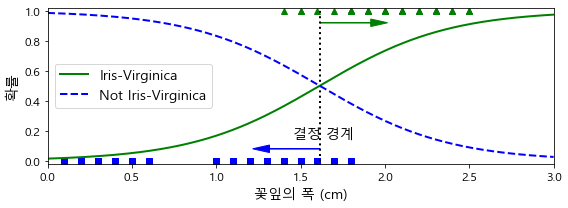

In [18]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [19]:
decision_boundary

array([1.61561562])

In [20]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

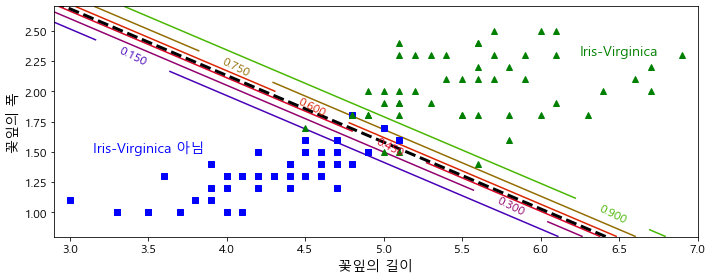

In [21]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [22]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

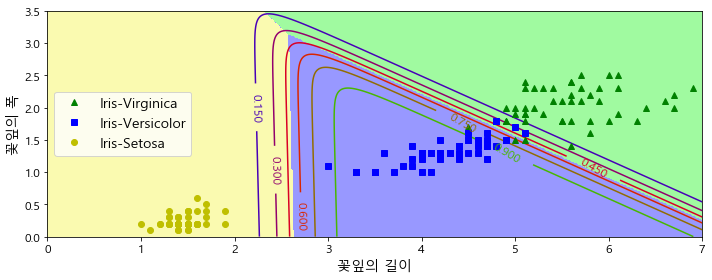

In [23]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [24]:
softmax_reg.predict([[5, 2]])

array([2])

In [25]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])